# SAM3 Video Bounding Box Selector

This notebook helps you:

1. Load a video with `mediapy`
2. Display a frame
3. Draw a bounding box with your mouse
4. Print coordinates in the format SAM3 expects

Run cells top-to-bottom. In the last cell, **click and drag** on the image to define the box.

In [7]:
# If rectangle interaction does not work in your environment,
# try switching to `%matplotlib widget` (requires ipympl).
%matplotlib widget

from pathlib import Path

import mediapy as media
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import numpy as np

In [8]:
# --- Configure these ---
VIDEO_PATH = "/data/sam3_based_labeling_pipeline/assets/videos/two_orca_hands.MOV"
FRAME_INDEX = 0

In [9]:
video_path = Path(VIDEO_PATH)
if not video_path.exists():
    raise FileNotFoundError(f"Video not found: {video_path}")

video_frames = media.read_video(str(video_path))
num_frames = len(video_frames)

if num_frames == 0:
    raise ValueError("Video has no frames")

if not (0 <= FRAME_INDEX < num_frames):
    raise ValueError(f"FRAME_INDEX must be in [0, {num_frames - 1}], got {FRAME_INDEX}")

frame = np.asarray(video_frames[FRAME_INDEX])
height, width = frame.shape[:2]

print(f"Loaded: {video_path}")
print(f"Total frames: {num_frames}")
print(f"Selected frame: {FRAME_INDEX}")
print(f"Frame size (width x height): {width} x {height}")

Loaded: /data/sam3_based_labeling_pipeline/assets/videos/two_orca_hands.MOV
Total frames: 1697
Selected frame: 0
Frame size (width x height): 1920 x 1080


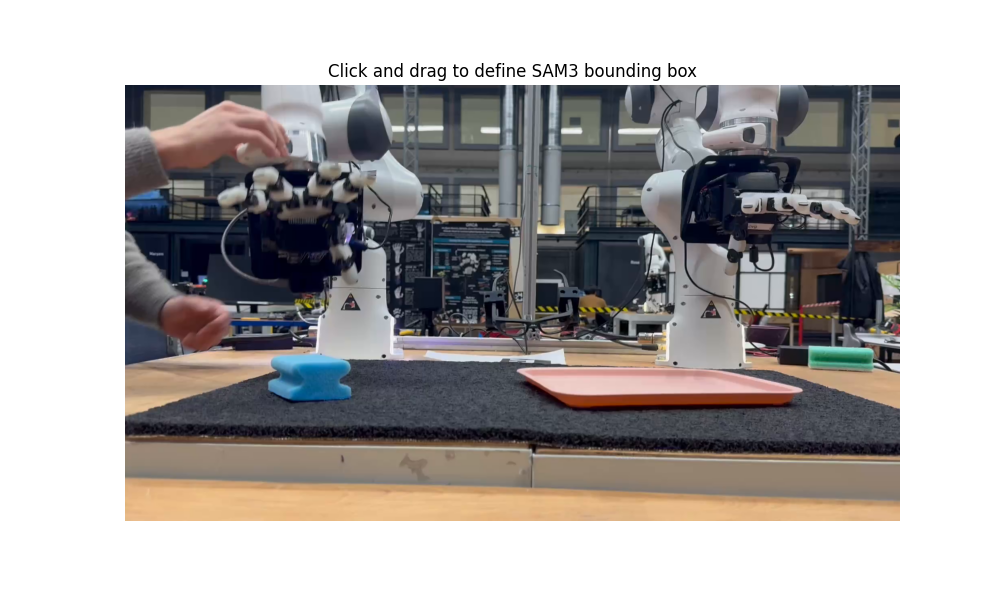

Draw a rectangle with the left mouse button.


In [10]:
selected_box_xyxy = None


def _on_select(eclick, erelease):
    global selected_box_xyxy

    if None in (eclick.xdata, eclick.ydata, erelease.xdata, erelease.ydata):
        print("Selection ignored: drag fully inside the image.")
        return

    x1 = int(round(min(eclick.xdata, erelease.xdata)))
    y1 = int(round(min(eclick.ydata, erelease.ydata)))
    x2 = int(round(max(eclick.xdata, erelease.xdata)))
    y2 = int(round(max(eclick.ydata, erelease.ydata)))

    x1 = max(0, min(x1, width - 1))
    x2 = max(0, min(x2, width - 1))
    y1 = max(0, min(y1, height - 1))
    y2 = max(0, min(y2, height - 1))

    if x2 <= x1 or y2 <= y1:
        print("Invalid box (zero/negative area). Try again.")
        return

    selected_box_xyxy = (x1, y1, x2, y2)

    # SAM3 often uses normalized XYWH when passed via `bounding_boxes`.
    norm_xywh = [x1 / width, y1 / height, (x2 - x1) / width, (y2 - y1) / height]

    print("\nBounding box selected:")
    print(f"SAM3 pixel XYXY tuple: {selected_box_xyxy}")
    print(f"SAM3 normalized XYWH list: {norm_xywh}")
    print("Example for script:")
    print(f"initial_hand_box_xyxy = {selected_box_xyxy}")
    print(f"bounding_boxes = [{norm_xywh}]")


fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(frame)
ax.set_title("Click and drag to define SAM3 bounding box")
ax.set_axis_off()

_selector = RectangleSelector(
    ax,
    _on_select,
    useblit=True,
    button=[1],
    minspanx=5,
    minspany=5,
    spancoords="pixels",
    interactive=True,
)

plt.show()
print("Draw a rectangle with the left mouse button.")

In [11]:
if selected_box_xyxy is None:
    print("No box selected yet. Run the previous cell and draw one first.")
else:
    print(f"Last selected SAM3 pixel XYXY: {selected_box_xyxy}")

Last selected SAM3 pixel XYXY: (171, 179, 694, 382)
